<a href="https://colab.research.google.com/github/garvit26/Hazardous-asteroid-detection/blob/main/PHAs_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dataset.csv', low_memory=False)
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [ ]:
df.shape

(958524, 45)

In [ ]:
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [ ]:
df.isnull().sum() / len(df) * 100

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

In [ ]:
#dropping name and prefix columns since they have maximum values as null
df = df.drop(['name', 'prefix'], axis=1)

In [ ]:
df.head(1)

,id,spkid,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.4,939.4,0.09,0.2,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301


In [ ]:
df[df['pha'] == 'Y'].isnull().sum()

id                   0
spkid                0
full_name            0
pdes                 0
neo                  0
pha                  0
H                    0
diameter          1845
albedo            1866
diameter_sigma    1877
orbit_id             0
epoch                0
epoch_mjd            0
epoch_cal            0
equinox              0
e                    0
a                    0
q                    0
i                    0
om                   0
w                    0
ma                   0
ad                   0
n                    0
tp                   0
tp_cal               0
per                  0
per_y                0
moid                 0
moid_ld              0
sigma_e              0
sigma_a              0
sigma_q              0
sigma_i              0
sigma_om             0
sigma_w              0
sigma_ma             0
sigma_ad             0
sigma_n              0
sigma_tp             0
sigma_per            0
class                0
rms                  0
dtype: int6

In [ ]:
df = df.dropna()

In [ ]:
df

,id,spkid,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.40,939.400,0.0900,0.200,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.20,545.000,0.1010,18.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.33,246.596,0.2140,10.594,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.00,525.400,0.4228,0.200,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.90,106.699,0.2740,3.140,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,bK16N07B,3755231,(2016 NB7),2016 NB7,N,N,16.20,3.793,0.0210,1.375,...,2.602600e-05,1.897900e-05,4.951000e-05,5.127900e-05,2.635700e-07,1.878300e-08,3.498100e-04,2.217200e-04,MBA,0.59145
891841,bK16N24W,3755298,(2016 NW24),2016 NW24,N,N,17.40,2.696,0.0610,0.701,...,1.788500e-05,1.538400e-04,3.026900e-03,3.326500e-03,1.472800e-06,1.949700e-07,1.413600e-02,1.198900e-03,MBA,0.42754
894103,bK16P66B,3757444,(2016 PB66),2016 PB66,N,N,17.20,3.271,0.0720,1.074,...,6.736600e-05,1.160600e-04,1.493200e-03,5.880600e-04,2.269800e-06,1.603500e-07,2.675200e-03,1.686400e-03,MBA,0.53016
901055,bK16TB9F,54000016,(2016 TF119),2016 TF119,N,N,16.00,3.009,0.0780,0.981,...,3.376000e-05,2.546000e-05,3.313800e-04,8.637800e-05,9.530100e-07,6.243600e-08,3.265500e-04,7.520900e-04,MBA,0.57294


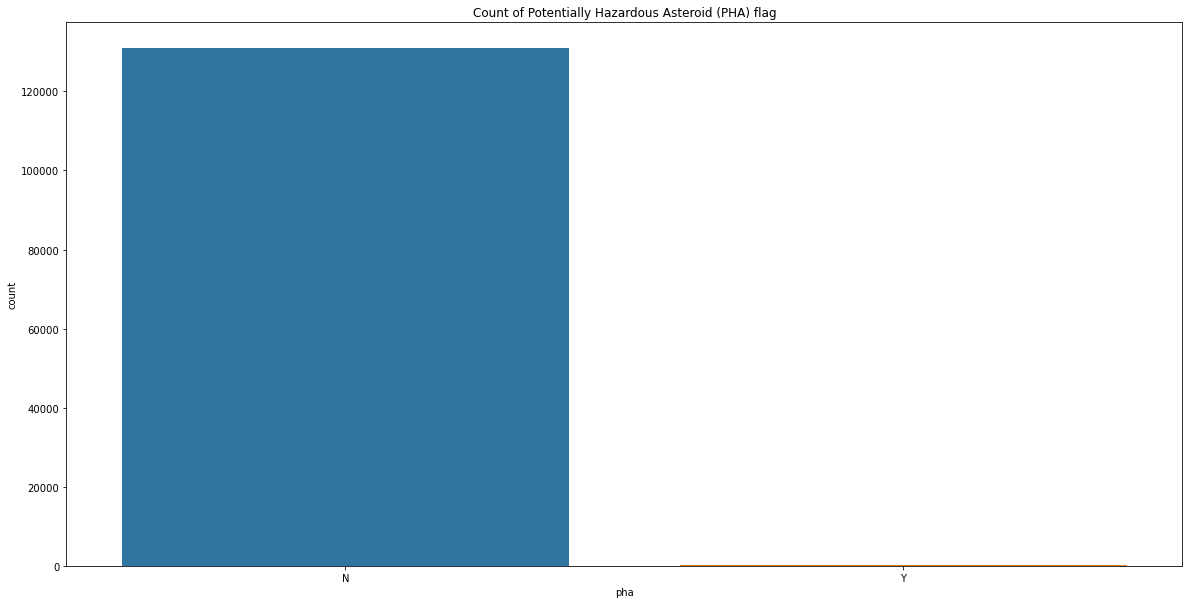

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Potentially Hazardous Asteroid (PHA) flag')
sns.countplot(data=df, x='pha');

In [ ]:
len(df[df['pha'] == 'N'])

130961

In [ ]:
len(df[df['pha'] == 'Y'])

181

In [ ]:
len(df[df['pha'] == 'Y'])/ len(df[df['pha'] == 'N']) * 100

0.13820908514748667

In [ ]:
df['equinox'].unique()

array(['J2000'], dtype=object)

In [ ]:
#we dropped all of these parameters because they are irrelevant or redundant
df = df.drop(['spkid', 'equinox','orbit_id','pdes'], axis=1)

In [ ]:
df.head(1)

,id,full_name,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,1 Ceres,N,N,3.4,939.4,0.09,0.2,2458600.5,58600,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131142 entries, 0 to 909489
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              131142 non-null  object 
 1   full_name       131142 non-null  object 
 2   neo             131142 non-null  object 
 3   pha             131142 non-null  object 
 4   H               131142 non-null  float64
 5   diameter        131142 non-null  float64
 6   albedo          131142 non-null  float64
 7   diameter_sigma  131142 non-null  float64
 8   epoch           131142 non-null  float64
 9   epoch_mjd       131142 non-null  int64  
 10  epoch_cal       131142 non-null  float64
 11  e               131142 non-null  float64
 12  a               131142 non-null  float64
 13  q               131142 non-null  float64
 14  i               131142 non-null  float64
 15  om              131142 non-null  float64
 16  w               131142 non-null  float64
 17  ma        

In [ ]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'APO', 'ATE', 'CEN',
       'AST', 'TNO'], dtype=object)

In [ ]:
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})

<AxesSubplot:>

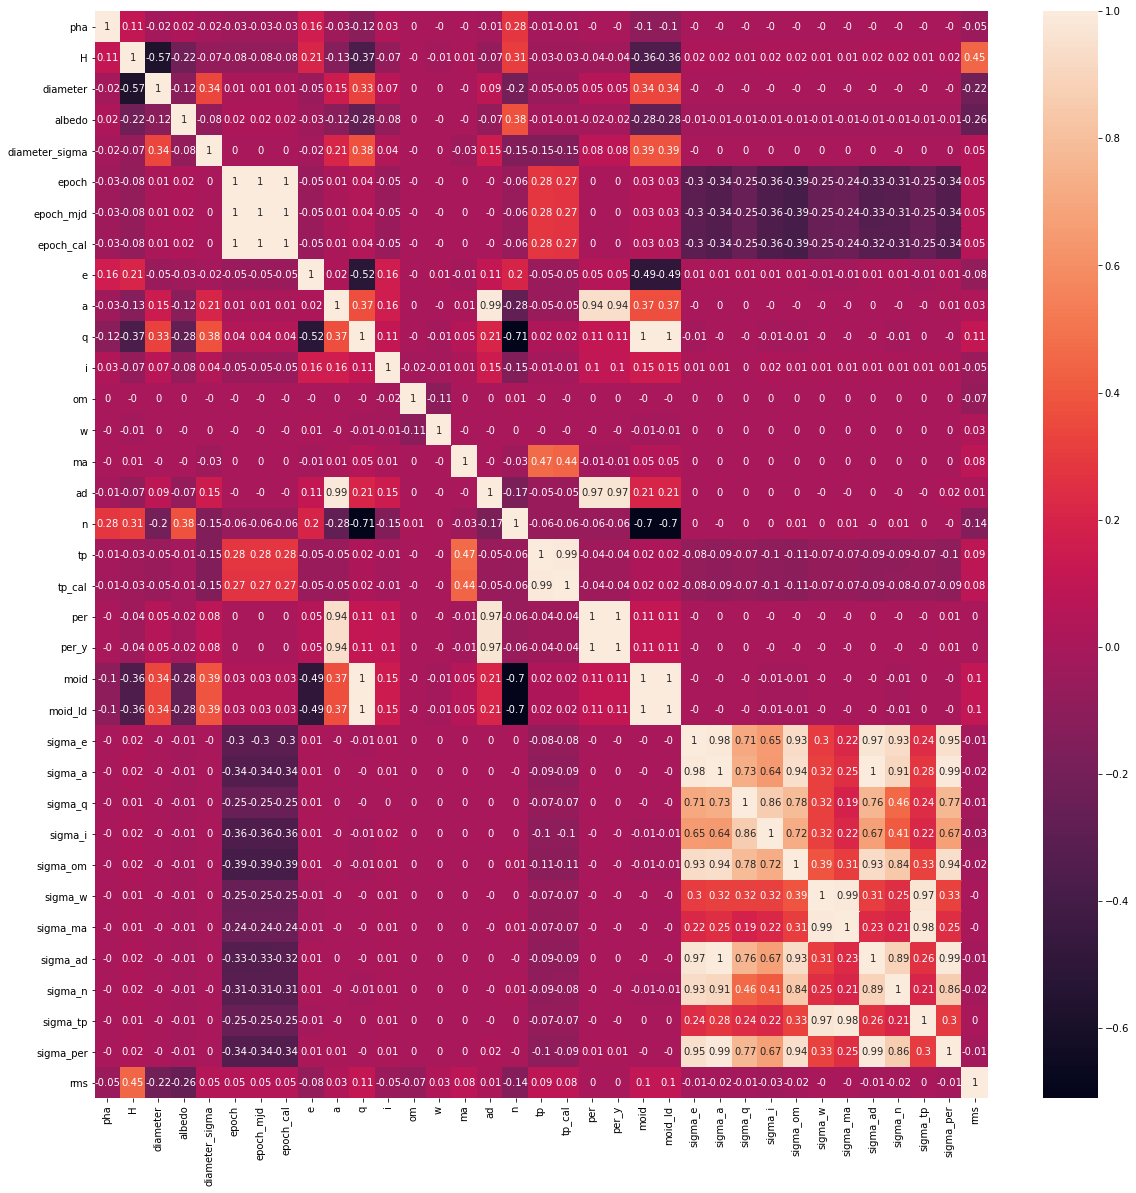

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=round(df.corr(),2), annot=True)

## ANOVA

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
X = df.drop(['pha','id','full_name','neo','class'], axis=1)
y = df['pha']

In [ ]:
feature_names = list(X)

In [ ]:
X.dtypes

H                 float64
diameter          float64
albedo            float64
diameter_sigma    float64
epoch             float64
epoch_mjd           int64
epoch_cal         float64
e                 float64
a                 float64
q                 float64
i                 float64
om                float64
w                 float64
ma                float64
ad                float64
n                 float64
tp                float64
tp_cal            float64
per               float64
per_y             float64
moid              float64
moid_ld           float64
sigma_e           float64
sigma_a           float64
sigma_q           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
rms               float64
dtype: object

In [ ]:
x_data = X.values
y_data = y.values

In [ ]:
y_data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
x_data

array([[3.40000e+00, 9.39400e+02, 9.00000e-02, ..., 3.78290e-08,
        9.41590e-09, 4.33010e-01],
       [4.20000e+00, 5.45000e+02, 1.01000e-01, ..., 4.07870e-05,
        3.68070e-06, 3.59360e-01],
       [5.33000e+00, 2.46596e+02, 2.14000e-01, ..., 3.52880e-05,
        3.10720e-06, 3.38480e-01],
       ...,
       [1.72000e+01, 3.27100e+00, 7.20000e-02, ..., 2.67520e-03,
        1.68640e-03, 5.30160e-01],
       [1.60000e+01, 3.00900e+00, 7.80000e-02, ..., 3.26550e-04,
        7.52090e-04, 5.72940e-01],
       [1.83000e+01, 1.60000e+00, 2.30000e-02, ..., 4.10880e-04,
        6.76390e-05, 7.57910e-01]])

In [ ]:
f_value = f_classif(x_data,y_data)

for feature in zip(feature_names,f_value[0]):
    print("Feature: ")
    print(feature)

print(f_value)

Feature: 
('H', 1523.9316102423168)
Feature: 
('diameter', 46.679813481595296)
Feature: 
('albedo', 31.844641772423657)
Feature: 
('diameter_sigma', 37.89413762791418)
Feature: 
('epoch', 115.4114979520692)
Feature: 
('epoch_mjd', 115.35471607901016)
Feature: 
('epoch_cal', 117.77371688537629)
Feature: 
('e', 3564.3300259803555)
Feature: 
('a', 116.33853963738241)
Feature: 
('q', 1865.694029170299)
Feature: 
('i', 111.52840871941767)
Feature: 
('om', 0.004209625493449224)
Feature: 
('w', 0.6122520877962326)
Feature: 
('ma', 0.24940397717651533)
Feature: 
('ad', 13.311231598632153)
Feature: 
('n', 11157.223669891873)
Feature: 
('tp', 15.678244767001713)
Feature: 
('tp_cal', 15.047314556270992)
Feature: 
('per', 2.215745039871343)
Feature: 
('per_y', 2.215745039870814)
Feature: 
('moid', 1364.138556257898)
Feature: 
('moid_ld', 1364.1385562576406)
Feature: 
('sigma_e', 0.027095330795633126)
Feature: 
('sigma_a', 0.034077152135135715)
Feature: 
('sigma_q', 0.01943401140896837)
Feature: 
(

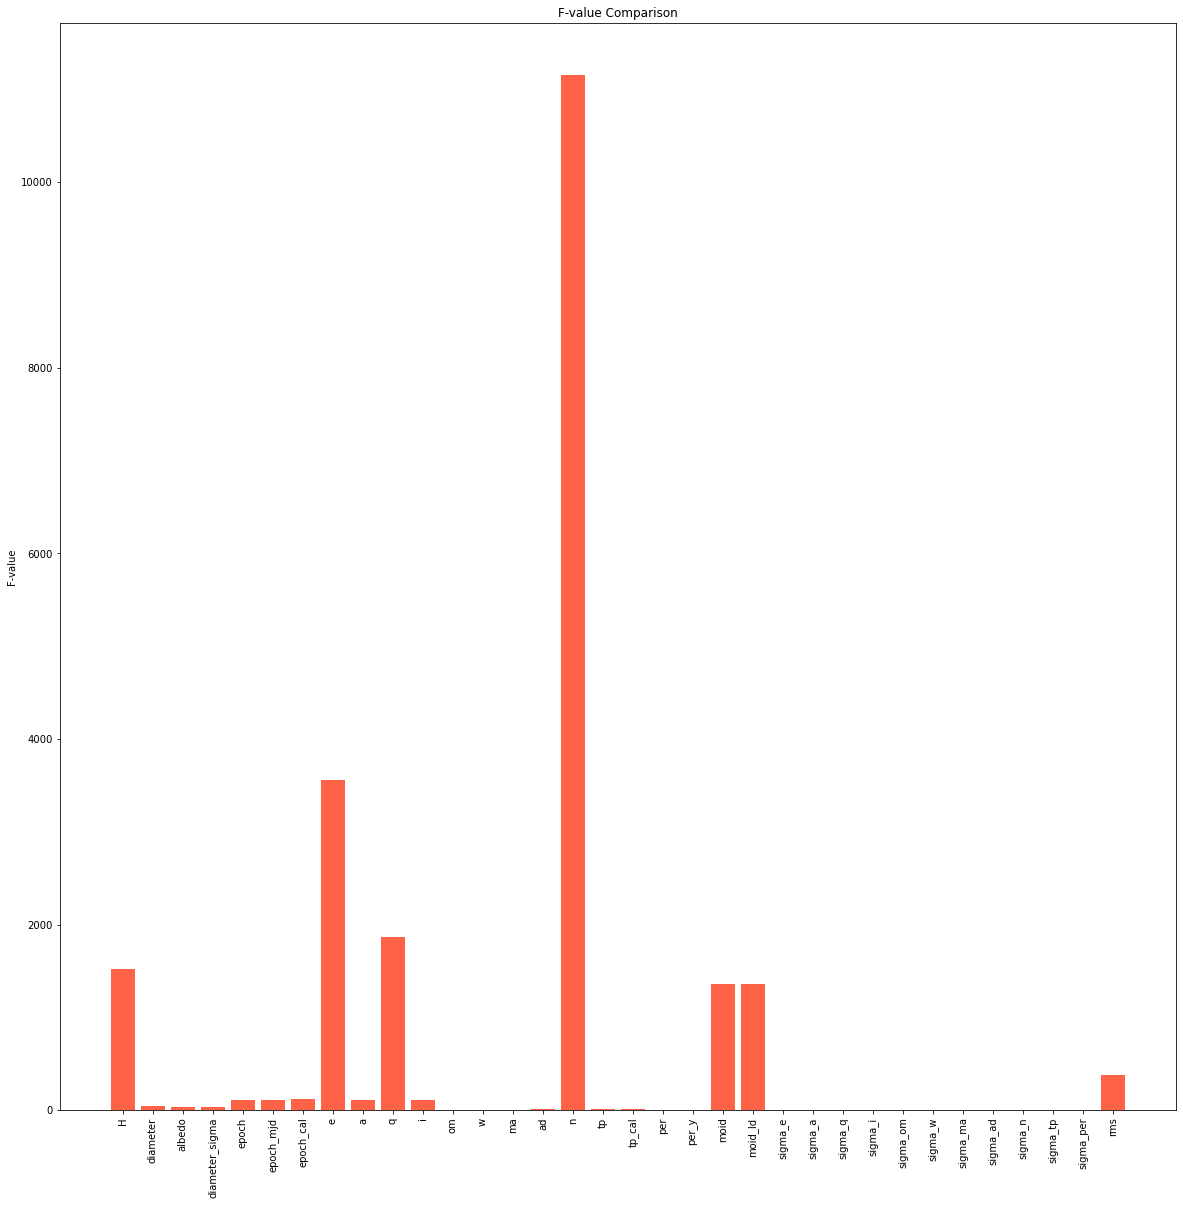

In [ ]:
plt.figure(figsize=(20,20))
plt.bar(x=feature_names,height=f_value[0],color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

In [ ]:
df.corr(method="kendall")

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\stats.py:4596: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))


,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
pha,1.000000,0.047659,-0.049473,0.011189,-0.039845,-0.027808,-0.027808,-0.027808,0.047120,-0.045384,...,-0.021452,0.016750,-0.013081,-0.016717,-0.012855,-0.021155,0.012246,-0.033666,-0.029708,-0.028652
H,0.047659,1.000000,-0.560739,-0.224991,0.110240,-0.044887,-0.044887,-0.044887,0.127417,-0.167332,...,0.241317,0.345311,0.240351,0.240747,0.161055,0.224874,0.441220,0.096022,0.185315,0.351746
diameter,-0.049473,-0.560739,1.000000,-0.197910,-0.063220,0.034888,0.034888,0.034888,-0.109160,0.395539,...,-0.000793,-0.120879,-0.191951,-0.141311,-0.045662,0.053934,-0.171099,0.060248,0.087797,-0.188449
albedo,0.011189,-0.224991,-0.197910,1.000000,-0.063707,0.015128,0.015128,0.015128,-0.022749,-0.277249,...,-0.313538,-0.278846,-0.081028,-0.139575,-0.148262,-0.368563,-0.314824,-0.206473,-0.363036,-0.190768
diameter_sigma,-0.039845,0.110240,-0.063220,-0.063707,1.000000,0.003675,0.003675,0.003675,-0.079491,0.143563,...,0.167653,0.136099,0.055825,0.100648,0.130294,0.183696,0.168146,0.154747,0.187868,0.161465
epoch,-0.027808,-0.044887,0.034888,0.015128,0.003675,1.000000,1.000000,1.000000,-0.020625,0.016869,...,-0.054626,-0.055782,-0.055257,-0.055102,-0.054734,-0.054137,-0.056011,-0.053974,-0.054109,0.027247
epoch_mjd,-0.027808,-0.044887,0.034888,0.015128,0.003675,1.000000,1.000000,1.000000,-0.020625,0.016869,...,-0.054626,-0.055782,-0.055257,-0.055102,-0.054734,-0.054137,-0.056011,-0.053974,-0.054109,0.027247
epoch_cal,-0.027808,-0.044887,0.034888,0.015128,0.003675,1.000000,1.000000,1.000000,-0.020625,0.016869,...,-0.054626,-0.055782,-0.055257,-0.055102,-0.054734,-0.054137,-0.056011,-0.053974,-0.054109,0.027247
e,0.047120,0.127417,-0.109160,-0.022749,-0.079491,-0.020625,-0.020625,-0.020625,1.000000,-0.112707,...,0.004875,0.069544,-0.010874,-0.245189,-0.502704,-0.008025,-0.015630,-0.460053,-0.070388,-0.043091
a,-0.045384,-0.167332,0.395539,-0.277249,0.143563,0.016869,0.016869,0.016869,-0.112707,1.000000,...,0.385462,0.220249,-0.084869,0.046885,0.198819,0.527708,0.238849,0.362213,0.571892,0.098483


In [ ]:
#sns.scatterplot(x='n', y='e',hue='pha', data=df)
# Placing Legend outside the Figure
#plt.legend(bbox_to_anchor=(1, 1), loc=2)
#plt.show()

## Modelling

In [ ]:
X = df.drop(['pha','id','full_name','neo','class'], axis=1)
y = df['pha']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')

    return model_scores

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()}

In [ ]:
MODEL_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
MODEL_scores.sort_values('Score')

,Score
KNeighborsClassifier,0.998246
SVC,0.998526
LogisticRegression,0.999263
RandomForestClassifier,0.999822
DecisionTreeClassifier,0.999949
GradientBoostingClassifier,0.999949
AdaBoostClassifier,1.000000


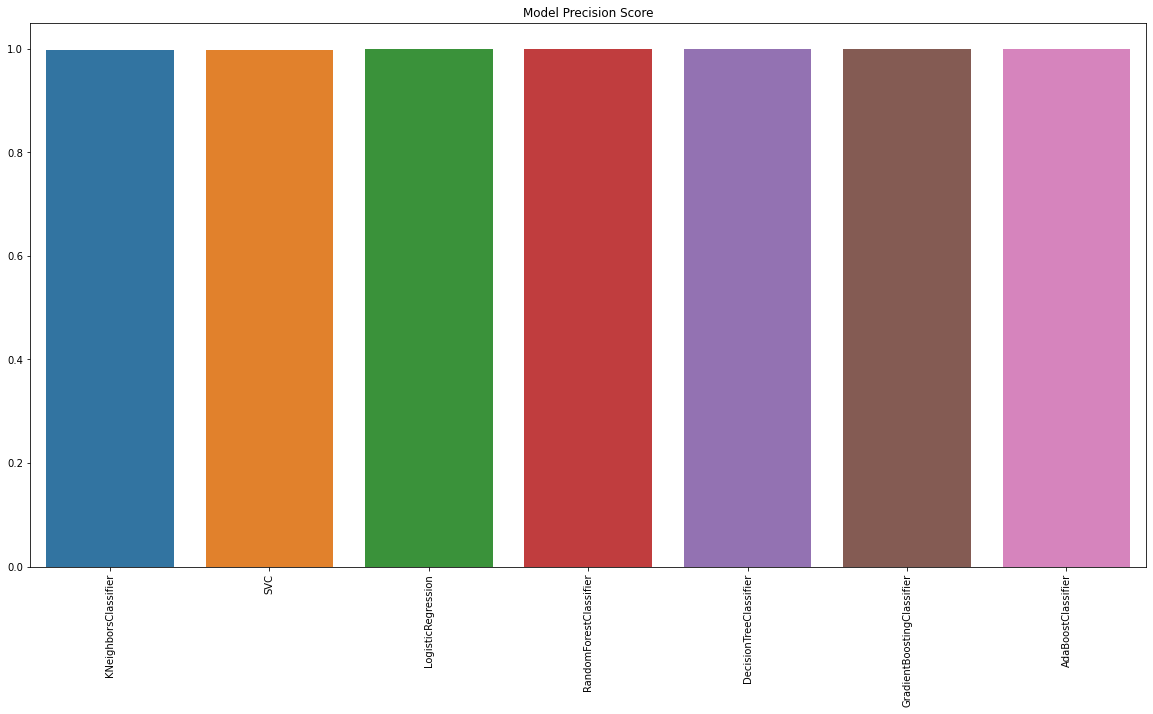

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=MODEL_scores.sort_values('Score').T)
plt.title('Model Precision Score')
plt.xticks(rotation=90);

# AdaBoost Classifier

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [ ]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39285
           1       1.00      1.00      1.00        58

    accuracy                           1.00     39343
   macro avg       1.00      1.00      1.00     39343
weighted avg       1.00      1.00      1.00     39343



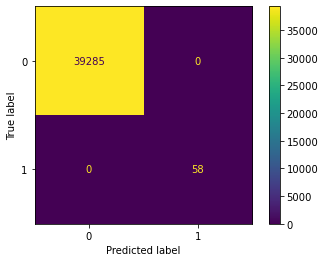

In [ ]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from scikitplot.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn import datasets,metrics

In [ ]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


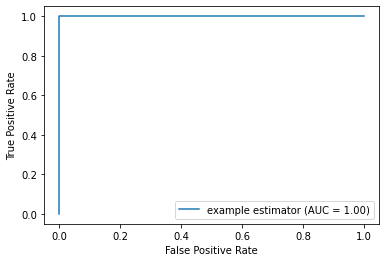

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
cv_acc = cross_val_score(model,X,y,cv=5,scoring='accuracy')
cv_acc = cv_acc.mean()


Text(0.5, 1.0, 'CV scores')

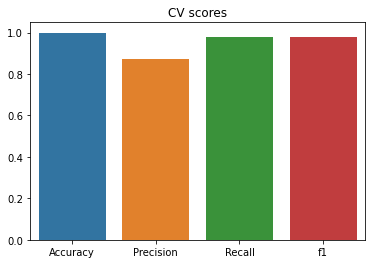

In [ ]:
cv_precision = cross_val_score(model,X,y,cv=5,scoring='precision')
cv_precision.mean()
cv_recall = cross_val_score(model,X,y,cv=5,scoring='recall')
cv_recall.mean()
cv_f1 = cross_val_score(model,X,y,cv=5,scoring='f1')
cv_f1.mean()
cv_merics = pd.DataFrame({'Accuracy': cv_acc.mean(),'Precision': cv_precision.mean(),'Recall': cv_recall.mean(),'f1': cv_recall.mean()},index=[0])
sns.barplot(data=cv_merics)
plt.title('CV scores')

In [ ]:
table = pd.DataFrame({'Model': "AdaBoost",'Accuracy': cv_acc.mean(),'Precision': cv_precision.mean(),'Recall': cv_recall.mean(),'f1': cv_f1.mean()},index=[0])

In [ ]:
cv_merics

,Accuracy,Precision,Recall,f1
0,0.999497,0.873469,0.977778,0.977778


In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)

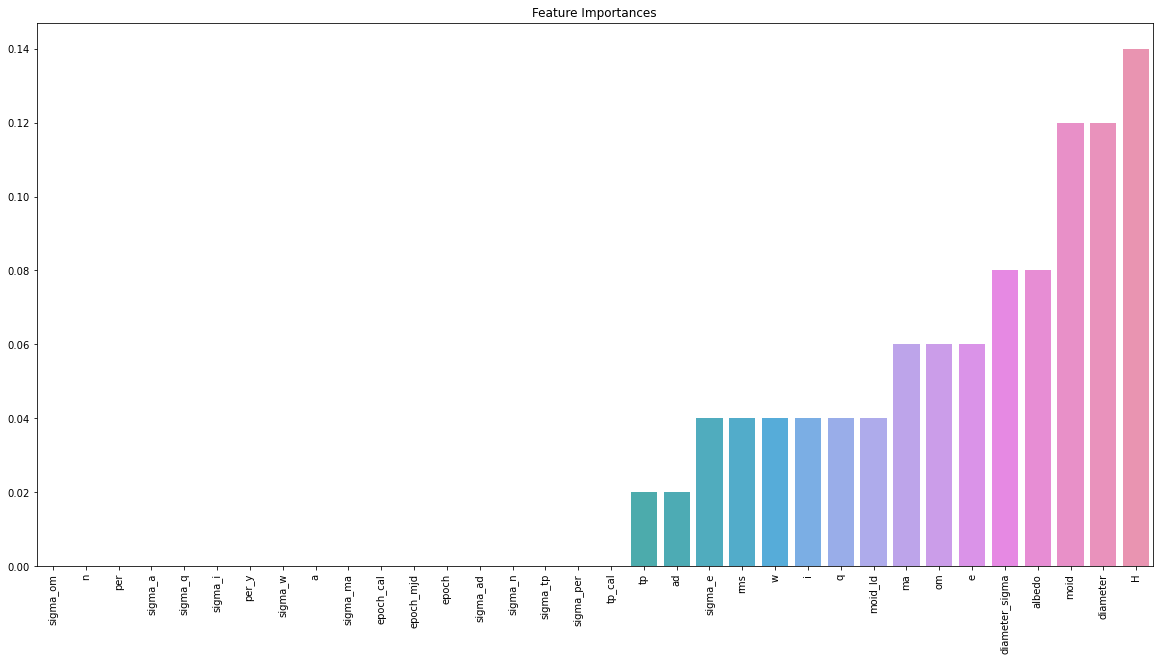

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

# Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

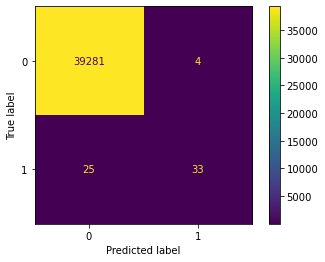

In [ ]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

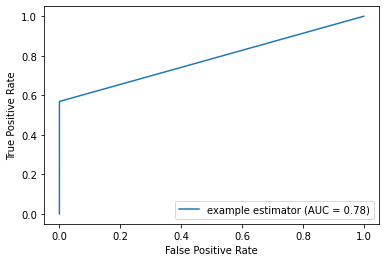

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

In [ ]:
def metricCalculation(y_test, pred, name, table):

    precision_metric = metrics.precision_score(y_test, pred, average = "macro")
    recall_metric = metrics.recall_score(y_test, pred, average = "macro")
    accuracy_metric = metrics.accuracy_score(y_test, pred)
    f1_metric = metrics.f1_score(y_test, pred, average = "macro")
    print('Precision metric:',round(precision_metric, 2))
    print('Recall Metric:',round(recall_metric, 2))
    print('Accuracy Metric:',round(accuracy_metric, 4))
    print('F1 score:',round(f1_metric, 2))

    metrics1 = pd.DataFrame({'Accuracy': accuracy_metric,'Precision': precision_metric,'Recall': recall_metric,'f1': f1_metric},index=[0])
    sns.barplot(data=metrics1)
    plt.title('scores')

    df2 = {'Model': name,'Accuracy': accuracy_metric,'Precision': precision_metric,'Recall': recall_metric,'f1': f1_metric}
    table = table.append(df2,ignore_index= True)
    return(table)

Precision metric: 0.95
Recall Metric: 0.78
Accuracy Metric: 0.9993
F1 score: 0.85


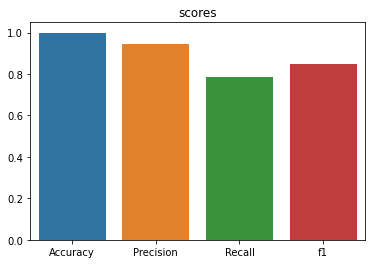

In [ ]:
table = metricCalculation(y_test, y_preds, "Logistic-Regression", table)

# KNN classifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

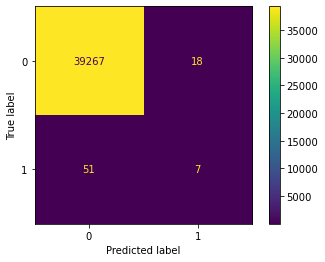

In [ ]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

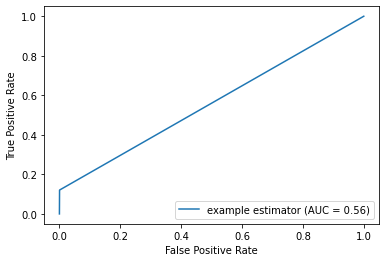

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

Precision metric: 0.64
Recall Metric: 0.56
Accuracy Metric: 0.9982
F1 score: 0.58


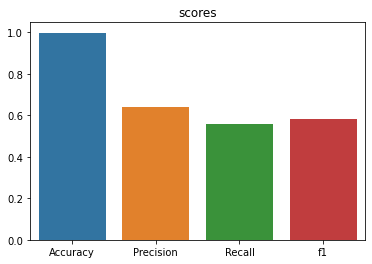

In [ ]:
table = metricCalculation(y_test, y_preds,"KNN",table)

# Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

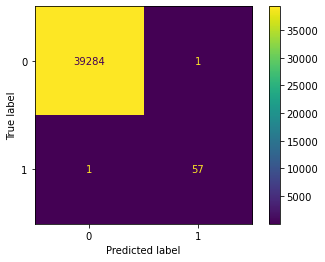

In [ ]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

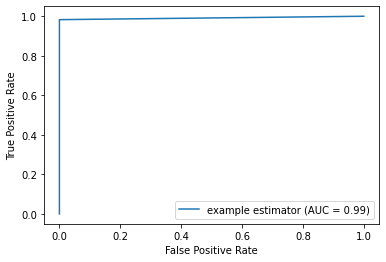

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

Precision metric: 0.99
Recall Metric: 0.99
Accuracy Metric: 0.9999
F1 score: 0.99


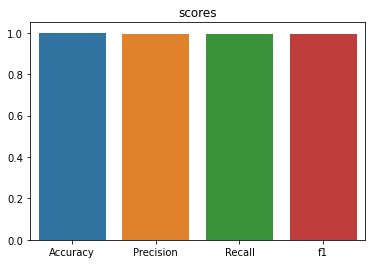

In [ ]:
table = metricCalculation(y_test, y_preds,"Decision-Tree",table)

# Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

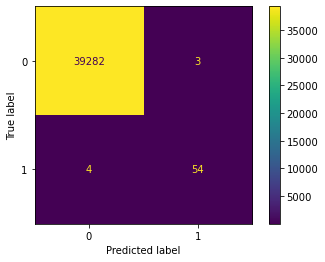

In [ ]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

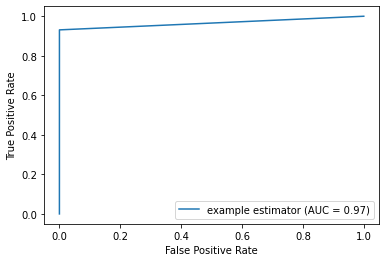

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

Precision metric: 0.97
Recall Metric: 0.97
Accuracy Metric: 0.9998
F1 score: 0.97


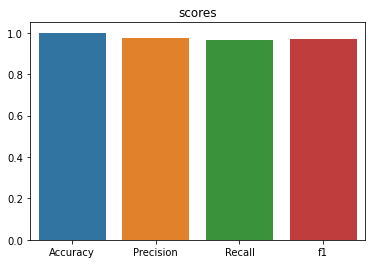

In [ ]:
table = metricCalculation(y_test, y_preds,"Random-Forest",table)

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)

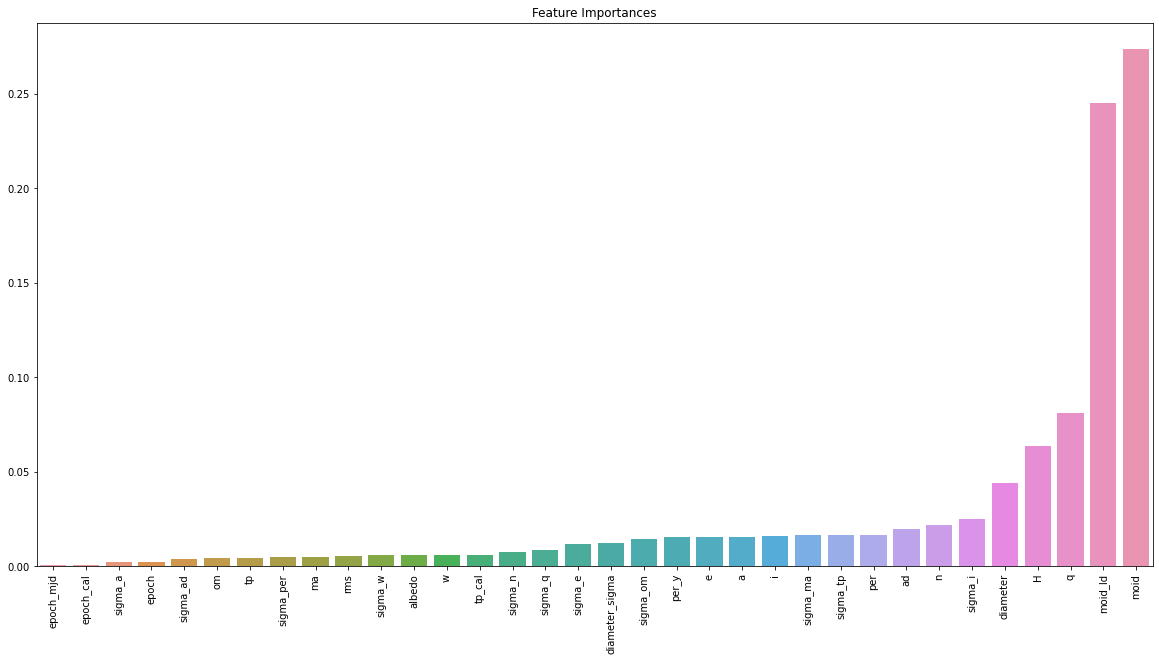

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

# SVC

In [ ]:
model = SVC()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

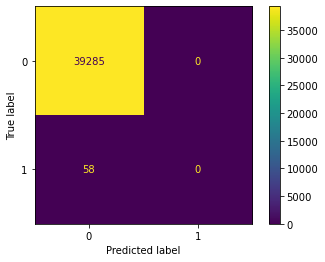

In [ ]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

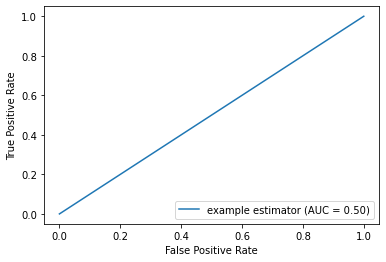

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

Precision metric: 0.5
Recall Metric: 0.5
Accuracy Metric: 0.9985
F1 score: 0.5


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


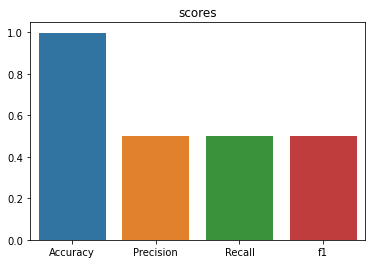

In [ ]:
table = metricCalculation(y_test, y_preds,"SVC",table)

# Gradient Boosting

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

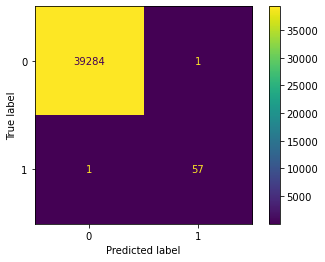

In [ ]:
cm = confusion_matrix(y_test, y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

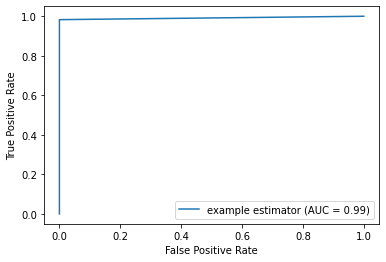

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

Precision metric: 0.99
Recall Metric: 0.99
Accuracy Metric: 0.9999
F1 score: 0.99


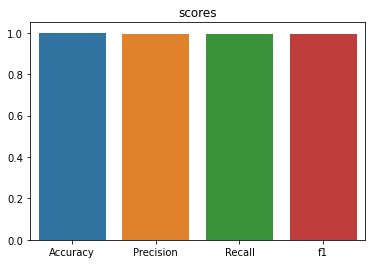

In [ ]:
table = metricCalculation(y_test, y_preds,"Gradient-Boosting",table)

In [ ]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns)

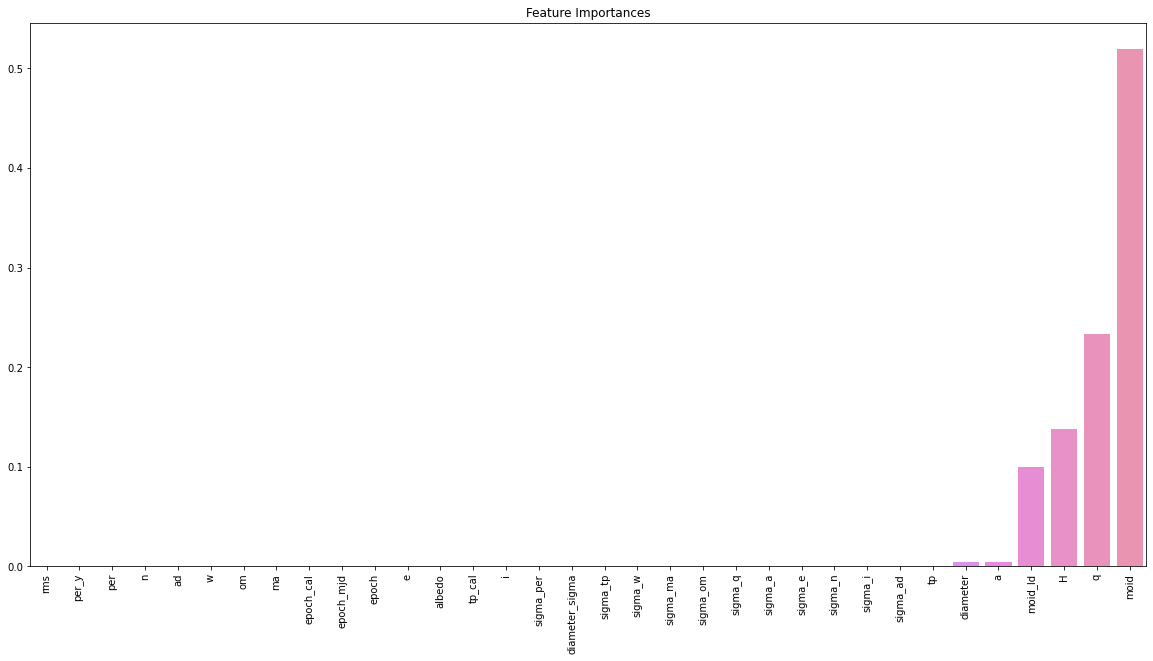

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);

In [ ]:
table

,Model,Accuracy,Precision,Recall,f1
0,AdaBoost,0.999497,0.873469,0.977778,0.895698
1,Logistic-Regression,0.999263,0.945628,0.784432,0.847184
2,KNN,0.998246,0.639351,0.560116,0.583898
3,Decision-Tree,0.999949,0.991367,0.991367,0.991367
4,Random-Forest,0.999822,0.973633,0.965479,0.969521
5,SVC,0.998526,0.499263,0.500000,0.499631
6,Gradient-Boosting,0.999949,0.991367,0.991367,0.991367
